# Schelling Model (basic)


In [149]:
%matplotlib inline
# Imports
import copy
import itertools
import numpy
import matplotlib.pyplot as plt
import pandas

import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

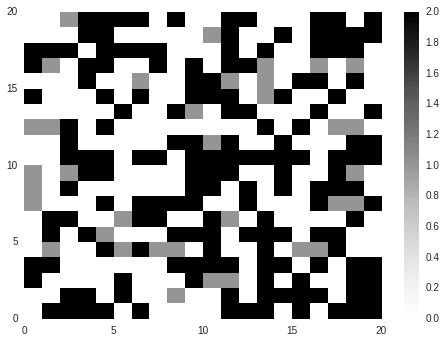

In [200]:
# Set parameters
grid_size = 20
group_proportion = 0.25
density = 0.5

# Create the space and activate random cells
space = numpy.zeros((grid_size, grid_size))

# Now sample the agents.
for row_id in range(grid_size):
    for col_id in range(grid_size):
        # Determine if this cell will be populated
        if numpy.random.random() <= density:
            # Determine this cell's initial group
            if numpy.random.random() <= group_proportion:
                cell_type = 1
            else:
                cell_type = 2
            
            #print("Creating household at ({0}, {1}) with type {2}".format(row_id, col_id, cell_type))
            space[row_id, col_id] = cell_type
        
# Now show the space
f = plt.figure()
p = plt.pcolor(space, snap=True)
c = plt.colorbar()

### Initialization method

  Below, we wrap the test method above in a method named ``initialize_space``.  We need to setup the following parameters:
  
  * __``grid_size``__: number of cells in each row or column
  * __``group_proportion``__: percentage of initial population that will be of group 1
  * __``density``__: percentage of cells that will be occupied in the space

In [ ]:
def initialize_space(grid_size, group_proportion, density):
    """
    Initialize a space.
    """
    
    # Create the space and activate random cells
    space = numpy.zeros((grid_size, grid_size), dtype=numpy.int8)

    # Now sample the agents.
    for row_id in range(grid_size):
        for col_id in range(grid_size):
            # Determine if this cell will be populated
            if numpy.random.random() <= density:
                # Determine this cell's initial group
                if numpy.random.random() <= group_proportion:
                    cell_type = 1
                else:
                    cell_type = 2

                #print("Creating household at ({0}, {1}) with type {2}".format(row_id, col_id, cell_type))
                space[row_id, col_id] = cell_type
                
    return space

### Testing out space initialization

  Let's test out our ``initialize_space`` method by visualizing for given parameters below.

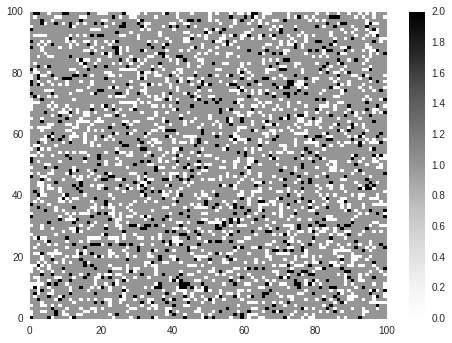

In [218]:
# Set parameters
grid_size = 10
group_proportion = 0.25
happy_proportion = 0.5
density = 0.5
window = 1

def display_space(grid_size=10, group_proportion=0.5, density=0.5):
    # Check
    assert(grid_size > 1)
    assert(group_proportion >= 0.0)
    assert(group_proportion <= 1.0)
    assert(density >= 0.0)
    assert(density <= 1.0)
    
    # Initialize space
    space = initialize_space(grid_size, group_proportion, density)
    
    # Plot
    f = plt.figure()
    p = plt.pcolor(space)
    c = plt.colorbar()

# Setup widget
interact(display_space,
         grid_size=IntSliderWidget(min=2, max=100, value=10),
         group_proportion=FloatSliderWidget(min=0.0, max=1.0, value=0.5),
         density=FloatSliderWidget(min=0.0, max=1.0, value=0.5))

In [118]:
# Pick a random household
empty_list = numpy.column_stack(numpy.where(space == 0))
household_list = numpy.column_stack(numpy.where(space > 0))
household_id = numpy.random.choice(range(len(household_list)))

# Check if the household is happy
row, col = household_list[household_id]
household_type = space[row, col]

# Get the set of positions with grid wrapping
neighbor_pos = [(x % grid_size, y % grid_size)
                for x, y in itertools.product(range(row-window, row+window+1),
                                              range(col-window, col+window+1))]
neighborhood = numpy.reshape([space[x, y] for x, y in neighbor_pos],
              (2*window+1, 2*window+1))
neighbor_count = len(numpy.where(neighborhood == household_type)[0]) - 1
neighbor_fraction = float(neighbor_count) / ((2 * window + 1) **2 - 1)
print(household_type)
print(neighborhood)
print(neighbor_count)
print(neighbor_fraction)

1.0
[[ 2.  2.  2.]
 [ 0.  1.  0.]
 [ 0.  0.  2.]]
0
0.0


In [255]:
def run_model_step(space, happy_proportion = 0.5, window=1):
    """
    Run  a step of the model.
    """
    space = copy.copy(space)
    
    # Get list of empty and occupied
    household_list = numpy.column_stack(numpy.where(space > 0))
    
    # Pick a random house
    household_id = numpy.random.choice(range(len(household_list)))

    # Check if the household is happy
    row, col = household_list[household_id]
    household_type = space[row, col]

    # Get the set of positions with grid wrapping
    neighbor_pos = [(x % grid_size, y % grid_size)
                    for x, y in itertools.product(range(row-window, row+window+1),
                                                  range(col-window, col+window+1))]
    neighborhood = numpy.reshape([space[x, y] for x, y in neighbor_pos],
                  (2*window+1, 2*window+1))
    neighbor_count = len(numpy.where(neighborhood == household_type)[0]) - 1
    neighbor_fraction = float(neighbor_count) / ((2 * window + 1) **2 - 1)
    
    # If the house is unhappy, move.
    if neighbor_fraction < happy_proportion:
        # Get empty cells
        empty_list = numpy.column_stack(numpy.where(space == 0))
        
        # Get empty target cell
        target_cell_id = numpy.random.choice(range(len(empty_list)))
        target_row, target_col = empty_list[target_cell_id]
        
        # Move the agent
        space[row, col] = 0
        space[target_row, target_col] = household_type
        """
        print("({0}, {1}) will move to ({2}, {3})".format(row, col,
                                                          target_row, target_col))
        """

    return space

In [264]:
# Set parameters
grid_size = 50
group_proportion = 0.33
happy_proportion = 0.33
density = 0.5
window = 1
max_steps = 100000

# Initialize space
space = initialize_space(grid_size, group_proportion, density)

# Setup space
space_history = [space]

# Iterate
for i in range(max_steps):
    # Append step history
    space_history.append(run_model_step(space_history[-1],
                                        happy_proportion,
                                        window))

In [265]:
def display_space_step(step=1):
    f = plt.figure()
    plt.pcolor(space_history[step])
    ax = f.gca()
    ax.set_aspect(1./ax.get_data_ratio())   

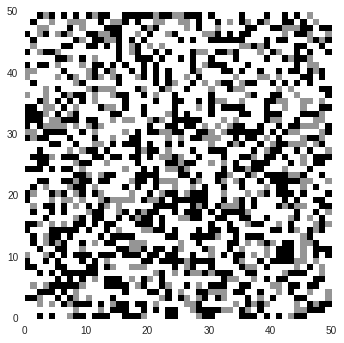

In [267]:
interact(display_space_step,
                step=IntSliderWidget(min=1, max=max_steps,
                                     step=1))